In [1]:
!wget https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&e=1&dl=0


--2024-06-28 13:10:35--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e36426d3c913cc0ae3bfe9bf1.dl.dropboxusercontent.com/cd/0/inline/CVsJYXwPVzhKeID8lZ-SztN1zTf60lmDJOb94mY5MlqoDySnJPhxu8meEy5PmKccA2Ara4znIFBBRaCfYStDEkPdCtuBFJgr4CG1kkp2dJCsIqG5b5Pdr70cvWXEQdvMvNx8-3GqXdmsGRszEZmFr_Hz/file# [following]
--2024-06-28 13:10:36--  https://uc8e36426d3c913cc0ae3bfe9bf1.dl.dropboxusercontent.com/cd/0/inline/CVsJYXwPVzhKeID8lZ-SztN1zTf60lmDJOb94mY5MlqoDySnJPhxu8meEy5PmKccA2Ara4znIFBBRaCfYStDEkPdCtuBFJgr4CG1kkp2dJCsIqG5b5Pdr70cvWXEQdvMvNx8-3GqXdmsGRszEZmFr_Hz/file
Resolving uc8e36426d3c913cc0ae3bfe9bf1.dl.dropboxusercontent.com (uc8e36426d3c913cc0ae3bfe9bf1.dl.dropboxusercontent.com)... 162.125.3.15, 2620:100:

In [2]:
!unzip /content/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b

Archive:  /content/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/ima

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.layers import Flatten,Dense

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
base_model = MobileNet(input_shape = (224,224,3), include_top = False)
for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units = 7, activation = 'softmax')(x)

model = Model(base_model.input,x)


17225924/17225924 [==============================] - 0s 0us/step


In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [6]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])


In [8]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    rescale = 1./255
)
train_data = train_datagen.flow_from_directory(
    directory = '/content/train',
    target_size = (224,224),
    batch_size = 32,

)

# train_data = train_datagen.flow_from_directory(
#   directory = '/content/train',
 #   target_size = (224,224),
  #  batch_size = 32,
   # class_mode = 'categorical')

train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [9]:
val_datagen = ImageDataGenerator(rescale=1/255)
val_data = val_datagen.flow_from_directory(
    directory = '/content/train',
    target_size = (224,224),
    batch_size = 32
)

Found 350 images belonging to 7 classes.


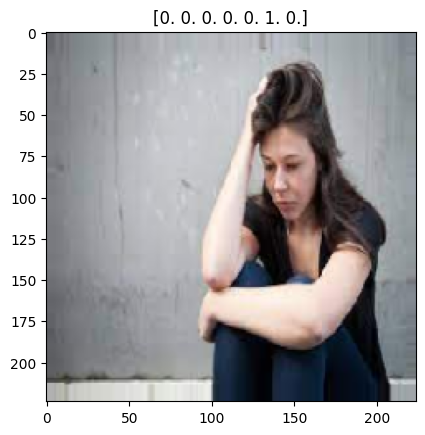

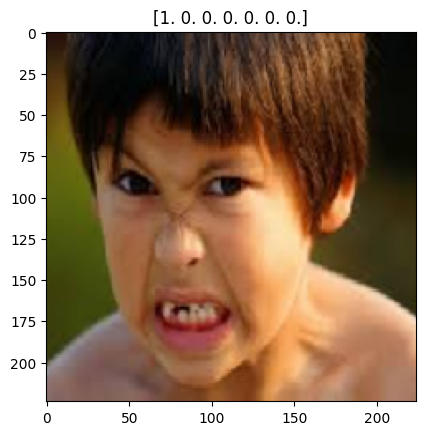

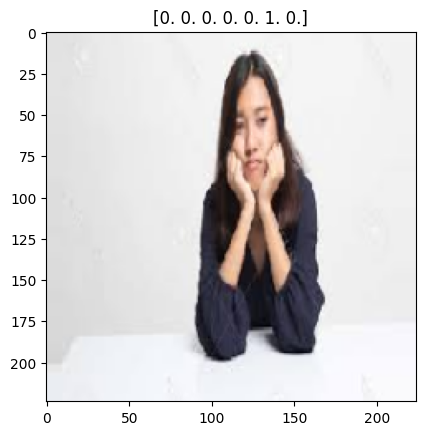

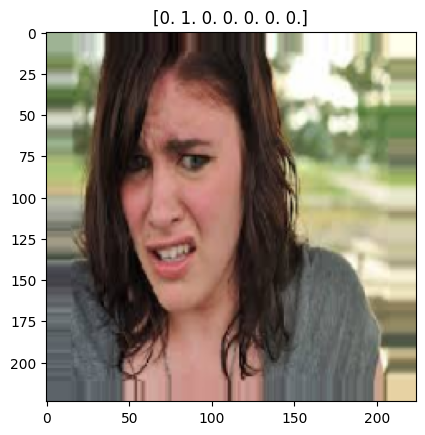

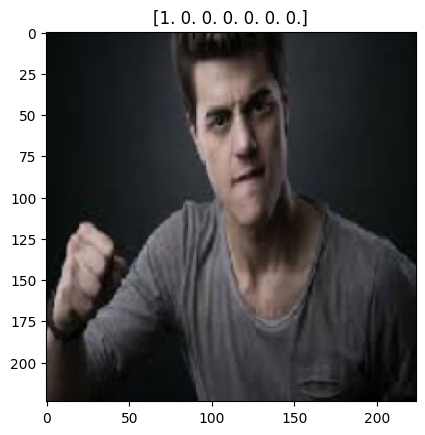

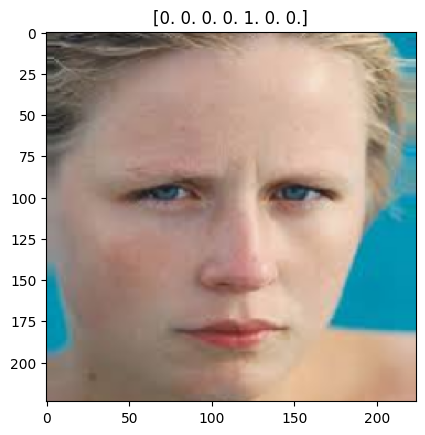

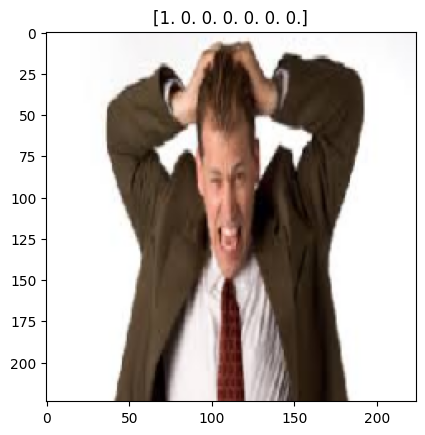

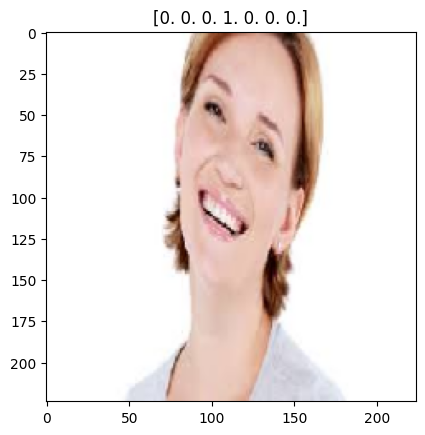

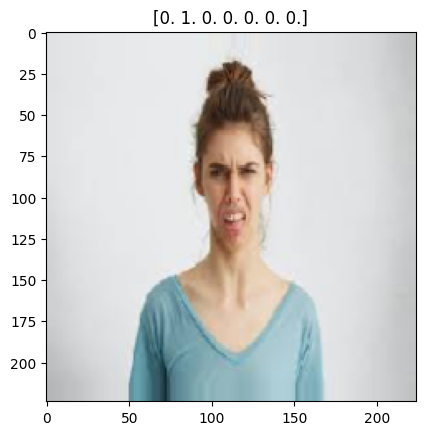

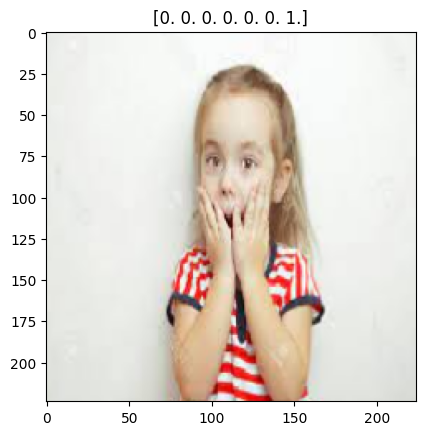

In [12]:
t_img, label = train_data.next()

def plotImage(img_arr, label):
  """
  input: image array and label
  output: plot image
  """
  count = 0
  for im, l in zip(img_arr, label):
    plt.imshow(im)
    plt.title(str(l))
    plt.axis=False
    plt.show()

    count+=1
    if count == 10:
      break
plotImage(t_img, label)

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 5, verbose = 1, mode = 'auto')
mc = ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'auto')

call_back = [es, mc]

In [15]:
hist = model.fit_generator(
    train_data,
    steps_per_epoch = 10,
    epochs = 30,
    validation_data = val_data,
    validation_steps = 8,
    callbacks = call_back
)

<ipython-input-15-f8d13af88621>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.1206 - accuracy: 0.9654
Epoch 1: val_accuracy did not improve from 0.98286
10/10 [==============================] - 37s 4s/step - loss: 0.1206 - accuracy: 0.9654 - val_loss: 0.1157 - val_accuracy: 0.9829
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.1039 - accuracy: 0.9748
Epoch 2: val_accuracy improved from 0.98286 to 0.99714, saving model to best_model.h5
10/10 [==============================] - 31s 3s/step - loss: 0.1039 - accuracy: 0.9748 - val_loss: 0.0309 - val_accuracy: 0.9971


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.1598 - accuracy: 0.9717
Epoch 3: val_accuracy did not improve from 0.99714
10/10 [==============================] - 61s 7s/step - loss: 0.1598 - accuracy: 0.9717 - val_loss: 0.0291 - val_accuracy: 0.9943
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.1030 - accuracy: 0.9686
Epoch 4: val_accuracy did not improve from 0.99714
10/10 [==============================] - 37s 4s/step - loss: 0.1030 - accuracy: 0.9686 - val_loss: 0.0160 - val_accuracy: 0.9943
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9843
Epoch 5: val_accuracy did not improve from 0.99714
10/10 [==============================] - 38s 4s/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0352 - val_accuracy: 0.9914
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.9843
Epoch 6: val_accuracy did not improve from 0.99714
10/10 [==========================

In [16]:
from keras.models import load_model
model = load_model('/content/best_model.h5')

In [17]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

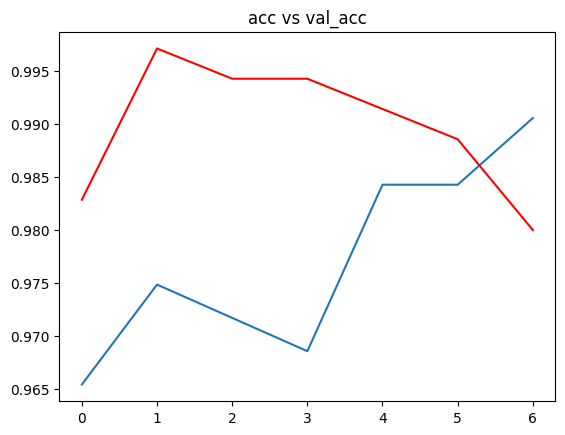

In [18]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title('acc vs val_acc')
plt.show()

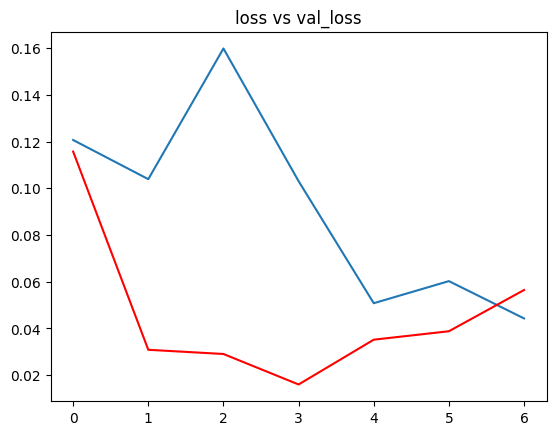

In [19]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title('loss vs val_loss')
plt.show()

In [20]:
op = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 1s 1s/step
Sad


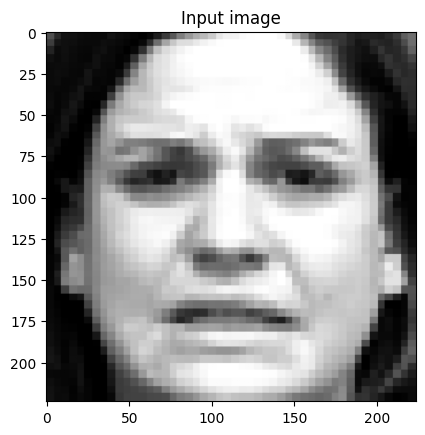

In [21]:
# testing cell

path = '/content/S068_004_00000009.png'
img = load_img(path, target_size = (224,224))
img = img_to_array(img)/255
input_arr = np.array([img])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
print(op[pred])
plt.imshow(input_arr[0])
plt.title("Input image")
plt.show()